## Unemployment Analysis

In [50]:
#Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the dataset
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [6]:
#viewing first few rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [8]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [36]:
#Renaming columns
df.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [38]:
df.describe()

,date,estimated unemployment rate,estimated employed,estimated labour participation rate,longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


In [40]:
#checking null values
df.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [42]:
#Checking any duplicates
df.duplicated().any()

False

In [44]:
#checking the datatype
df.dtypes

state                                          object
date                                   datetime64[ns]
frequency                                      object
estimated unemployment rate                   float64
estimated employed                              int64
estimated labour participation rate           float64
region                                         object
longitude                                     float64
latitude                                      float64
dtype: object

In [48]:
#changing the dtype of date to datetime
df['date']= pd.to_datetime(df['date'], dayfirst=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   state                                267 non-null    object        
 1   date                                 267 non-null    datetime64[ns]
 2   frequency                            267 non-null    object        
 3   estimated unemployment rate          267 non-null    float64       
 4   estimated employed                   267 non-null    int64         
 5   estimated labour participation rate  267 non-null    float64       
 6   region                               267 non-null    object        
 7   longitude                            267 non-null    float64       
 8   latitude                             267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


In [71]:
#Extracting month from the date
df['month_int'] = df['date'].dt.month
df['Month_Name'] = df['date'].dt.strftime('%B')
df.head()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,Month_Name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,January
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,February
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,March
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,April
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


## Exploratory Data Analysis

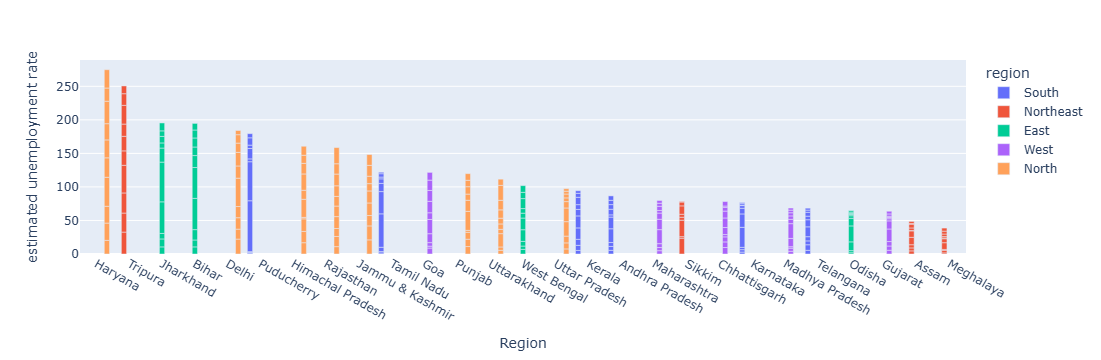

In [73]:
#Unemployment rate in each region
fig = px.bar(df,x = df['state'],y=df['estimated unemployment rate'],color = 'region',barmode='group')
fig.update_layout(xaxis={'title':'Region','categoryorder':'total descending'})
fig.show()

In [105]:
#grouping the numeric dat
data = df.groupby(['Month_Name'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
data


,estimated unemployment rate,estimated employed,estimated labour participation rate
Month_Name,,,
April,22.236154,1.057020e+07,35.297308
August,10.313333,1.442904e+07,42.390741
February,9.266154,1.548827e+07,44.180769
January,9.196538,1.563720e+07,44.626538
July,9.834444,1.441802e+07,42.274815
June,10.911111,1.385739e+07,41.203333
March,10.782593,1.453866e+07,43.746667
May,23.244444,1.150739e+07,39.647778
October,8.026296,1.457998e+07,41.438519


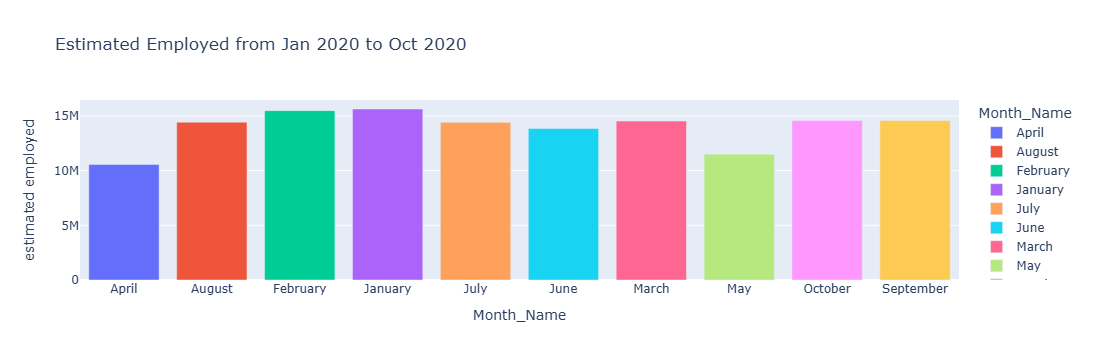

In [101]:
#Estimated employed
fig = px.bar(dat,x = 'Month_Name',y = 'estimated employed',color = 'Month_Name',title = 'Estimated Employed from Jan 2020 to Oct 2020')
fig.show()

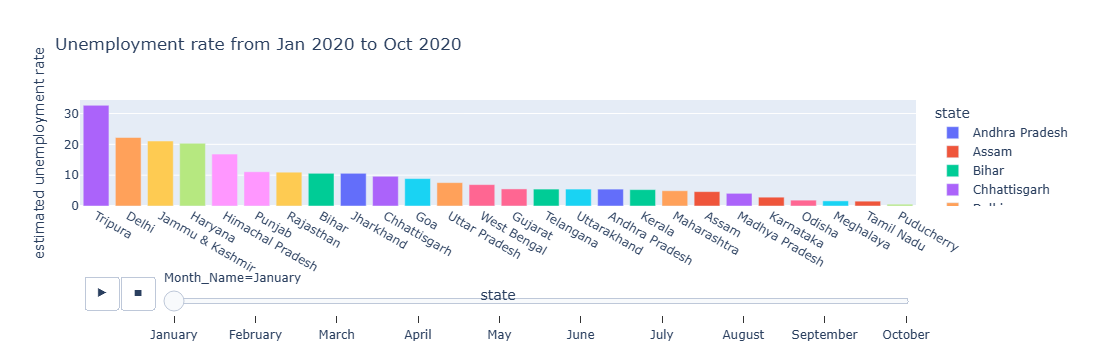

In [115]:
#UnEmployment rate from jan to oct
fig = px.bar(df,x='state',y='estimated unemployment rate',animation_frame='Month_Name',color = 'state',
             title='Unemployment rate from Jan 2020 to Oct 2020')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

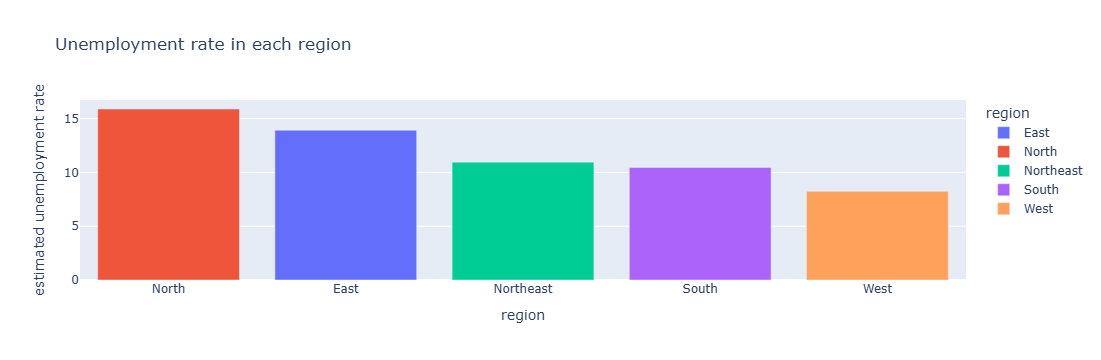

In [133]:
#Unemployment rate in each region
region  = df.groupby(['region'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean().reset_index()
fig = px.bar(region,x='region',y='estimated unemployment rate',color = 'region',title = 'Unemployment rate in each region')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

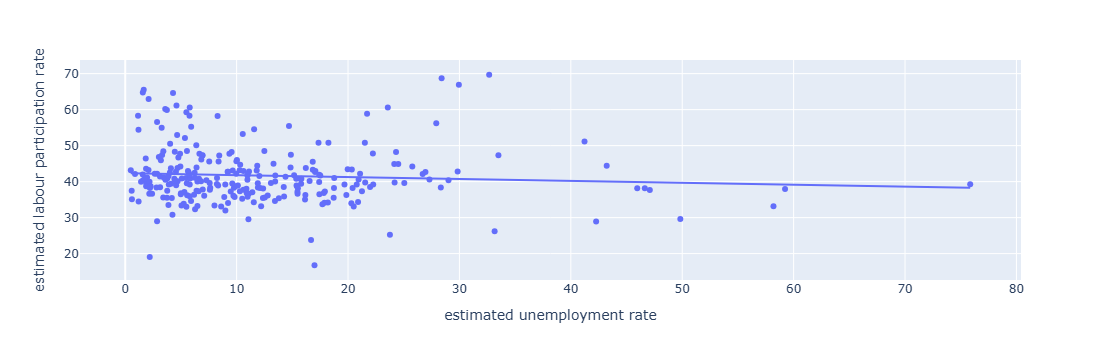

In [137]:
# Relationship between the unemployment rate and the labor participation rate.
fig = px.scatter(df,x = 'estimated unemployment rate',y='estimated labour participation rate',trendline = 'ols')
fig.show()

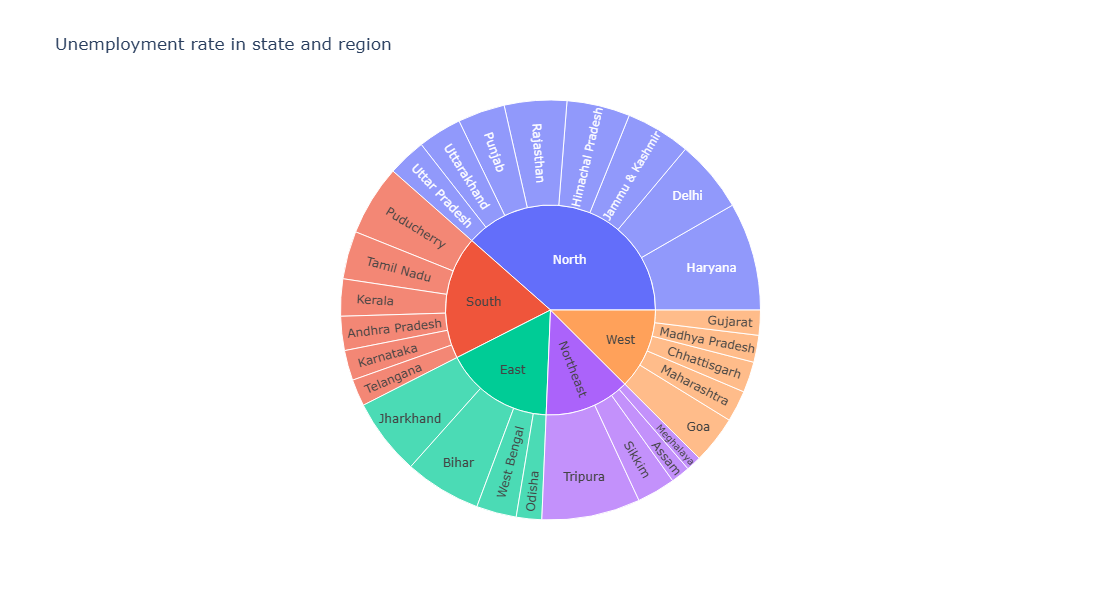

In [151]:
#Unemployment rate in state and region
unemployment = df.groupby(['region','state'])[['estimated unemployment rate']].mean().reset_index()
fig = px.sunburst(unemployment,path = ['region','state'],values='estimated unemployment rate',title = 'Unemployment rate in state and region',height = 600)
fig.show()